# Homework 5 (line plots and distributions)

For this homework assignment you are required to use Python (pandas, matplotlib, and seaborn) to do the exercises. Please write your own code and provide your code along with your responses to the questions.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Part 1 (time charts)

For this part we will plot population change in some of the world's most populous countries. To get started, read in the CSV file provided on Canvas.
* Population data source:  https://data.worldbank.org/indicator/SP.POP.TOTL



In [3]:
df = pd.read_csv("country_populations.csv", index_col = 0)
df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,59330.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,167596160.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,10494489.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,118615741.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,5928386.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,990150.0,1014211.0,1038618.0,1063175.0,1087700.0,1111812.0,1135522.0,1159611.0,1184645.0,1211011.0,...,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1768086.0,1756374.0
"Yemen, Rep.",5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,6515904.0,6673981.0,...,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,34449825.0
South Africa,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,21050540.0,21704214.0,...,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,60414495.0


### Problem 1 (2 points)

Create two line plots on the same figure.
* On the first chart, plot the populations of India, China, and the United States from 1960 to 2023.
* On the second chart, plot the populations of the United States, Indonesia, Pakistan, Nigeria, Brazil, and Bangladesh from 1960 to 2023.

Do some additional formatting to the line charts:
* Use different colors for each country (the color for the United States should be the same in both)
* Label lines with country names directly, using the country color as the text color
* Add horizontal gridlines
* Remove unnecessary axis lines and tick marks
* Add chart and figure titles, and label units appropriately
   *  Scales should not be the same in both charts (second should be "zoomed in" to see populations of smaller countries)
* Make sure all text is horizontal

**Hint**: it might be helpful to transpose the dataframe so that years are rows and countries are columns

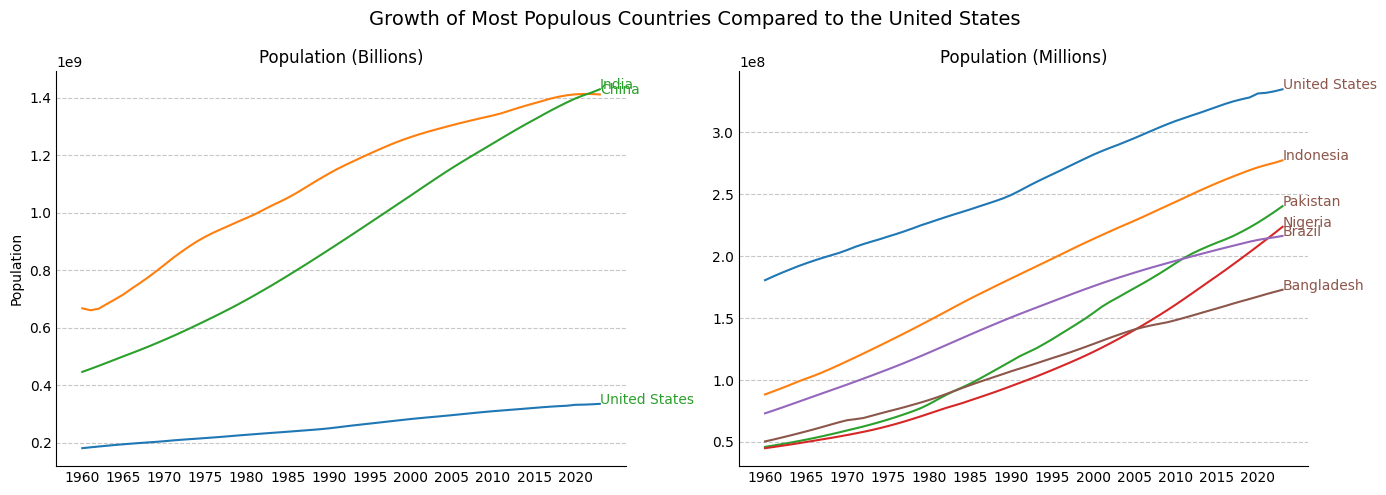

In [4]:
# Strip column names to remove any unwanted spaces
df.columns = df.columns.str.strip()

# Transpose the dataframe so years are rows and countries are columns
df = df.T

# Reset the index to make 'Country' a column and create a numerical index for years
df = df.reset_index().rename(columns={'index': 'Year'})

# Convert 'Year' column to integers
df['Year'] = df['Year'].astype(int)

# Set 'Year' column as the index
df = df.set_index('Year')

# Define the two country groups
countries1 = ["United States", "China", "India"]
countries2 = ["United States", "Indonesia", "Pakistan", "Nigeria", "Brazil", "Bangladesh"]

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Define the x-axis ticks to show every 5 years
years = df.index[df.index % 5 == 0]  # Select years divisible by 5

# First chart (India, China, USA)
for country in countries1:
    if country in df.columns:
        axes[0].plot(df.index, df[country], label=country)

axes[0].set_title("Population (Billions)")
axes[0].set_ylabel("Population")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
axes[0].tick_params(axis='both', which='both', length=0)
axes[0].set_xticks(years)  # Set x-axis ticks every 5 years

# Label the lines directly
for country in countries1:
    if country in df.columns:
        axes[0].text(df.index[-1], df[country].iloc[-1], country, color=axes[0].lines[-1].get_color())

# Second chart (US + smaller countries)
for country in countries2:
    if country in df.columns:
        axes[1].plot(df.index, df[country], label=country)

axes[1].set_title("Population (Millions)")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].tick_params(axis='both', which='both', length=0)
axes[1].set_xticks(years)  # Set x-axis ticks every 5 years

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Label the lines directly
for country in countries2:
    if country in df.columns:
        axes[1].text(df.index[-1], df[country].iloc[-1], country, color=axes[1].lines[-1].get_color())

# Set main title
fig.suptitle("Growth of Most Populous Countries Compared to the United States", fontsize=14)

plt.tight_layout()
plt.show()

### Problem 2a (1 point)

Create a new dataframe that computes the **yearly percent change** in population each year for all countries
* Adjust the values in the dataframe so that they represent percents (multiply by 100 if necessary)
* Reference:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

In [5]:
# Your answer here
# Compute the yearly percent change directly without resetting the index
df_pct_change = df.pct_change()

df_pct_change

<ipython-input-5-2efd0af359ac>:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pct_change = df.pct_change()


Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,0.022030,0.026602,0.019446,0.021158,0.015706,0.031701,0.081860,0.025717,0.056646,0.016261,...,0.055385,0.027615,0.028696,0.013509,0.030750,0.024300,0.018802,0.028390,0.032064,0.031433
1962,0.015606,0.027326,0.020353,0.021457,0.014715,0.031039,0.078113,0.026194,0.055985,0.016426,...,0.020408,0.027122,0.029024,0.017714,0.028617,0.024065,0.018899,0.030235,0.032296,0.031540
1963,0.013990,0.027532,0.021008,0.021908,0.014204,0.029978,0.074905,0.026701,0.054602,0.016349,...,0.137143,0.028750,0.029375,0.021291,0.027072,0.023644,0.018565,0.030799,0.032483,0.031644
1964,0.012231,0.028069,0.021627,0.022114,0.013103,0.029226,0.071881,0.027019,0.052858,0.016124,...,0.025126,0.027654,0.029730,0.020983,0.025653,0.023068,0.019386,0.031087,0.032460,0.031691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.004530,0.026911,0.029512,0.026340,0.034536,-0.004251,0.017730,0.020627,0.007821,0.009983,...,-0.003103,0.009086,0.023902,0.010644,0.010510,-0.004567,0.024559,0.013035,0.030533,0.020092
2020,0.001343,0.026782,0.031844,0.026156,0.033223,-0.005726,0.017775,0.017579,0.008210,0.009748,...,-0.003553,0.009104,0.023919,0.010145,0.014271,0.000702,0.023373,0.012307,0.029773,0.020519
2021,-0.000450,0.026075,0.028924,0.025734,0.032167,-0.009226,0.017169,0.016233,0.008383,0.009520,...,-0.003951,0.008478,0.023909,0.008655,0.017843,-0.002288,0.021608,0.010039,0.028815,0.020668


### Problem 2b (1.5 points)

Plot the percent change in population from **1970** to 2023 of the following 9 countries on the same graph:
* The United States, China, India, Indonesia, Pakistan, Nigeria, Brazil, Bangladesh, and Mexico

Follow the same principles for designing the line chart as in problem 1, except:
* Only use color for the United States, China, and India (use gray for all other countries)
* Only label the lines for the United States, China, and India


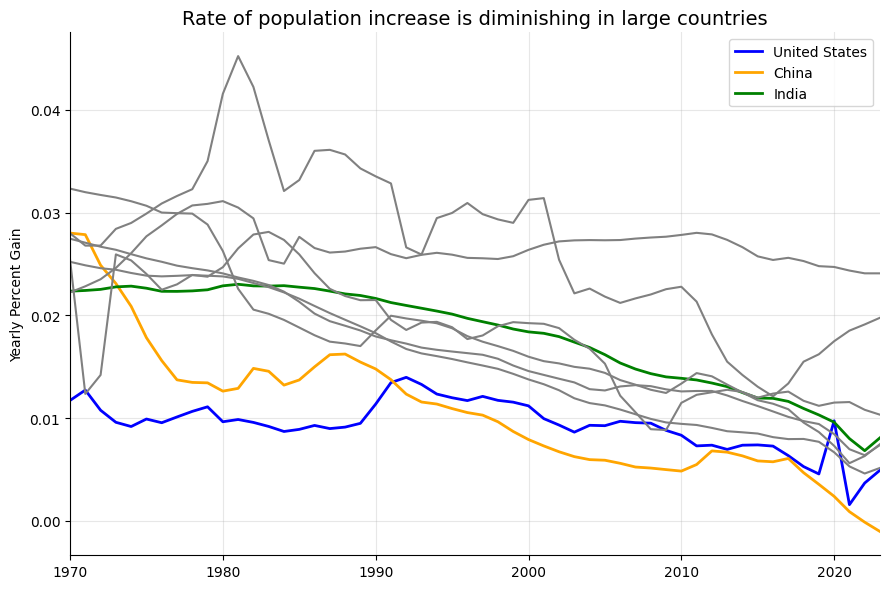

In [6]:
countries_to_plot = [
    "United States", "China", "India",
    "Indonesia", "Pakistan", "Nigeria",
    "Brazil", "Bangladesh", "Mexico"
]
# Make sure 'United States' etc. are in there exactly.

df_pct_subset = df_pct_change.loc[1970:2023, countries_to_plot]

fig, ax = plt.subplots(figsize=(9,6))

colors = {"United States": "blue", "China": "orange", "India": "green"}

for country in countries_to_plot:
    color = colors.get(country, "gray")
    label = country if country in colors else None
    ax.plot(df_pct_subset.index, df_pct_subset[country],
            color=color, label=label, linewidth=2 if label else 1.5)

ax.set_title("Rate of population increase is diminishing in large countries", fontsize=14)
ax.set_ylabel("Yearly Percent Gain")
ax.set_xticks(range(1970, 2024, 10))
ax.set_xlim(1970, 2023)
ax.grid(True, alpha=0.3)
ax.legend(loc="best")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout()
plt.show()

### Problem 2c (1.5 points)

Redesign the previous figure using ***small multiples***. Create a 3x3 grid of line plots, using the same y-axis range across all plots.
* Label each plot with the country name
* Remove unnecessary axis lines and tick marks as before

<ipython-input-7-de17958705dd>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pct_change = df.pct_change() * 100


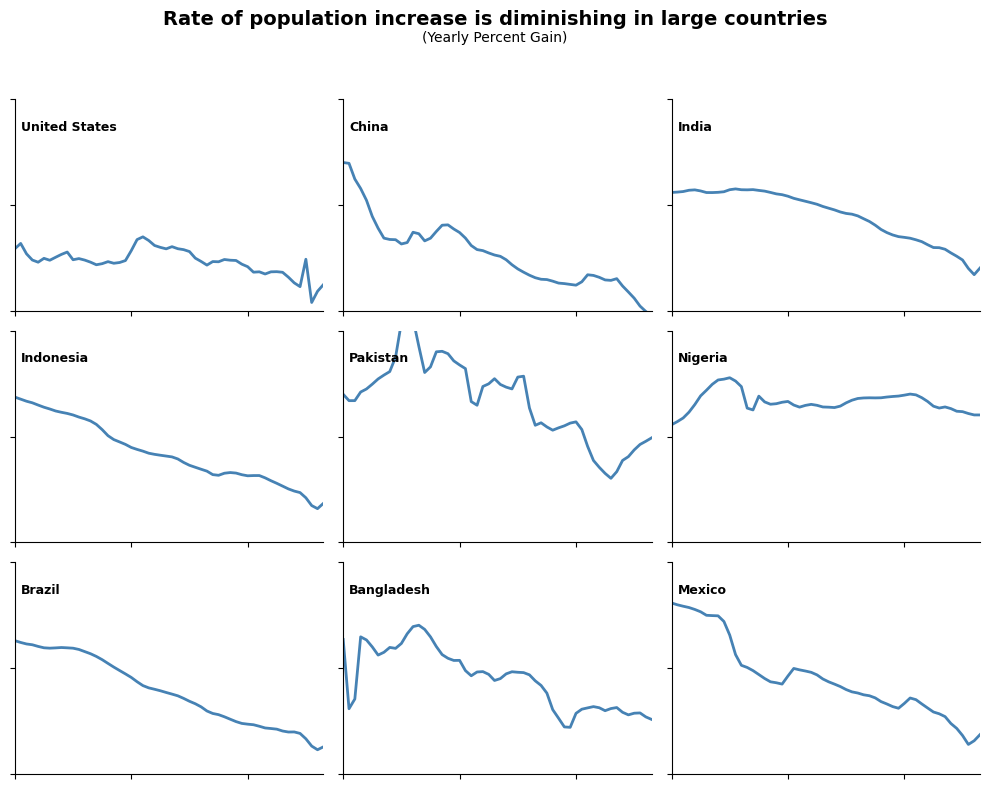

In [7]:

df_pct_change = df.pct_change() * 100

# 2. Pick the 9 countries of interest
countries = [
    ["United States", "China",      "India"],
    ["Indonesia",     "Pakistan",   "Nigeria"],
    ["Brazil",        "Bangladesh", "Mexico"]
]
all_countries = [c for row in countries for c in row]  # Flatten list of lists

# Slice from 1970 to 2023 for those 9 countries
df_subset = df_pct_change.loc[1970:2023, all_countries]

# 3. Create a 3×3 figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8), sharex=True, sharey=True)

# Force all subplots to have the same x-range and y-range
x_min, x_max = 1970, 2023
y_min, y_max = 0, 4    # 0–4% range as in your reference chart

# Define ticks we want to see on the x- and y-axes
x_ticks = [1970, 1990, 2010]
y_ticks = [0, 2, 4]

axes_flat = axes.ravel()  # Flatten the 3×3 grid into a 1D list of Axes

for ax, country in zip(axes_flat, all_countries):
    # Plot the line for this country
    ax.plot(df_subset.index, df_subset[country], color="steelblue", linewidth=2)

    # Fix the axis limits for consistency
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Choose exactly which ticks to show
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)

    # Label the subplot with the country's name
    ax.text(
        0.02, 0.85,
        country,
        transform=ax.transAxes,
        fontsize=9,
        fontweight="bold"
    )

    # Remove top & right spines for a cleaner look
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    # Hide x tick labels unless it’s the bottom row
    if ax not in axes[-1, :]:
        ax.set_xticklabels([])
    # Hide y tick labels unless it’s the left column
    if ax not in axes[:, 0]:
        ax.set_yticklabels([])

# 4. Add a big title and a smaller subtitle
fig.suptitle(
    "Rate of population increase is diminishing in large countries",
    fontsize=14,
    fontweight="bold",
    y=0.98
)
fig.text(
    0.5, 0.94,
    "(Yearly Percent Gain)",
    ha="center",
    fontsize=10
)

# Adjust layout so title fits well
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


## Part 2 (Histograms)

For this part we will get another look at the Delhi, India climate data set using histograms and density plots.
* To get started, load the climate data provided on Canvas:

In [8]:
df_temps = pd.read_csv("DailyDelhiClimateTrain.csv")
df_temps.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


### Problem 3 (2 points)

Create 3 histograms on the same figure to represent temperature counts across all available years.
* Use bin sizes = 1 degree C, 2 degrees C, and 5 degrees C respectively
* Include the kernel density for reference with each histogram
* Label the units appropriately on each chart
* Title each chart with the bin size

Reference:  https://seaborn.pydata.org/generated/seaborn.histplot.html

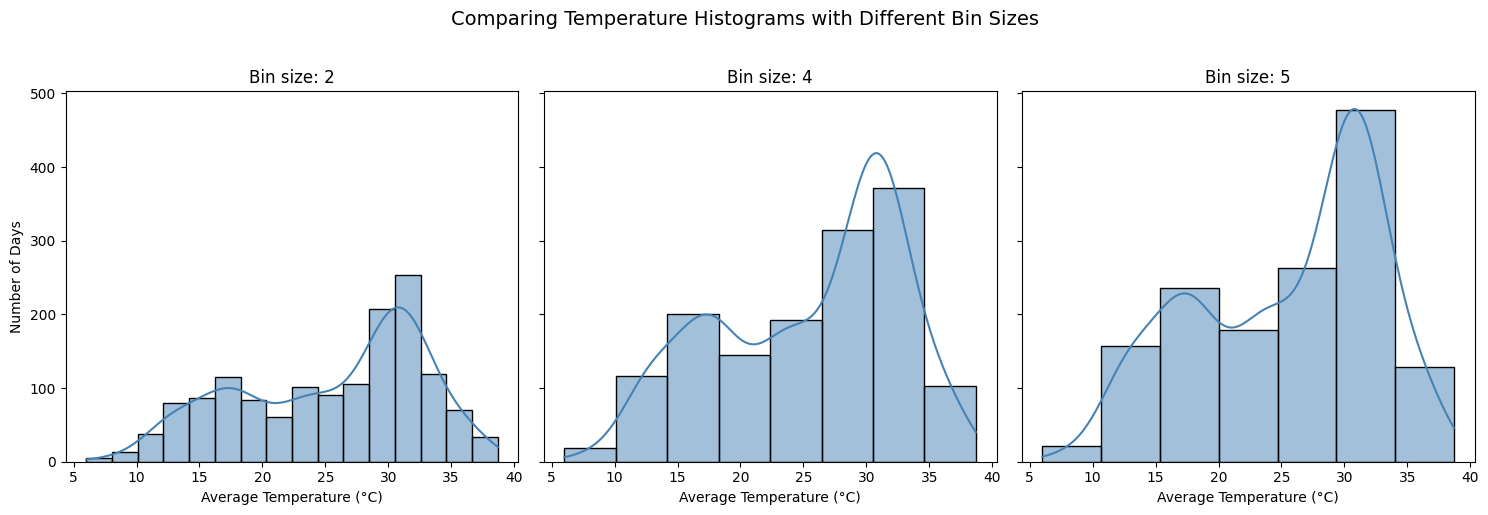

In [9]:
# Convert the 'date' column to datetime if needed
df_temps['date'] = pd.to_datetime(df_temps['date'], errors='coerce')

# 2) Create a figure with 3 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# 3) Define the three bin widths we want
bin_sizes = [2, 4, 5]

# 4) Plot histograms with different bin widths
for i, bin_size in enumerate(bin_sizes):
    ax = axes[i]
    sns.histplot(
        data=df_temps,
        x="meantemp",        # name of the temperature column
        binwidth=bin_size,   # 1, 2, or 5
        kde=True,            # include kernel density estimate
        color="steelblue",
        edgecolor="black",
        ax=ax
    )
    # Label the axes
    ax.set_xlabel("Average Temperature (°C)")
    ax.set_ylabel("Number of Days")
    # Title each chart with the bin size
    ax.set_title(f"Bin size: {bin_size}")

# 5) Give an overall title and tighten up the layout
plt.suptitle("Comparing Temperature Histograms with Different Bin Sizes", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

### Problem 4 (2 points)

Create a single chart with the kernel densities for temperature plotted for each year (2013, 2014, 2015, and 2016).
* Label units appropriately
* Include a legend to show which curve belongs to which year
* What do you notice about the change in shape of the density curves?

Reference:  https://seaborn.pydata.org/generated/seaborn.kdeplot.html

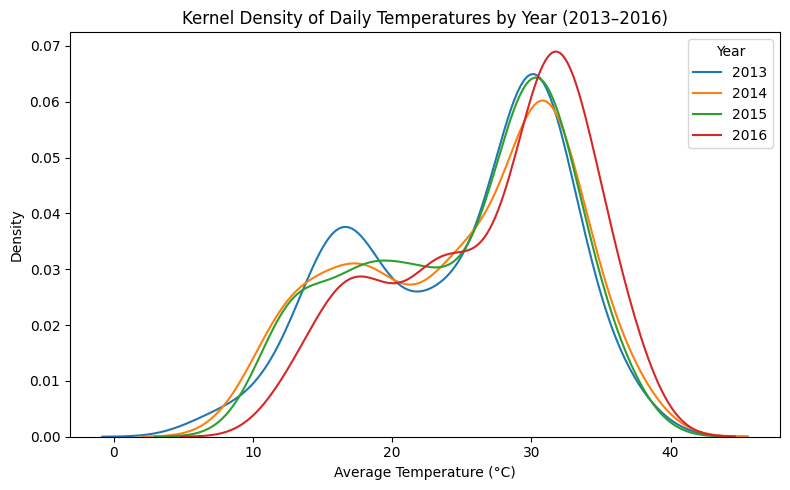

In [10]:
# Create a figure
plt.figure(figsize=(8, 5))

# Plot a separate kernel density for each year
years = [2013, 2014, 2015, 2016]
for yr in years:
    # Slice the data to just rows for this particular year
    mask = df_temps["date"].dt.year == yr
    sns.kdeplot(
        data=df_temps[mask],
        x="meantemp",
        label=str(yr),       # So each curve gets a label in the legend
        fill=False           # Or True if you want filled areas
    )

# Label the axes and add a legend
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Density")
plt.title("Kernel Density of Daily Temperatures by Year (2013–2016)")
plt.legend(title="Year")

plt.tight_layout()
plt.show()